# В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту.

## Данные
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)

## Обязательное задание
1) Визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

2) Аналогично исследовать скопления голосов за и против отдельно

3) Подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия


In [287]:
import numpy as np
import pandas as pd

In [288]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [311]:
data = pd.read_csv('geo.csv', delimiter = ';', index_col = False)
data.head()

,Unnamed: 0,x,y,comment_class
0,0,"37,61","55,78",-1
1,1,"37,61","55,78",-1
2,2,"37,60","55,74",-1
3,3,"37,56","55,73",-1
4,4,"37,57","55,73",-1


In [312]:
df = pd.DataFrame(data, columns = ['x', 'y', 'comment_class'])
df.head()

,x,y,comment_class
0,"37,61","55,78",-1
1,"37,61","55,78",-1
2,"37,60","55,74",-1
3,"37,56","55,73",-1
4,"37,57","55,73",-1


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null object
y                108806 non-null object
comment_class    108806 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [314]:
cc = df['comment_class']
cc = list(cc)
cc[:5]

[-1, -1, -1, -1, -1]

In [315]:
x = list( map( lambda x: float(x.replace(',', '.')), list(df['x']) ) )
y = list( map( lambda x: float(x.replace(',', '.')), list(df['y']) ) )

In [316]:
y = list(df['y'])
y = list( map( lambda x: float(x.replace(',', '.')), list(df['y']) ) )

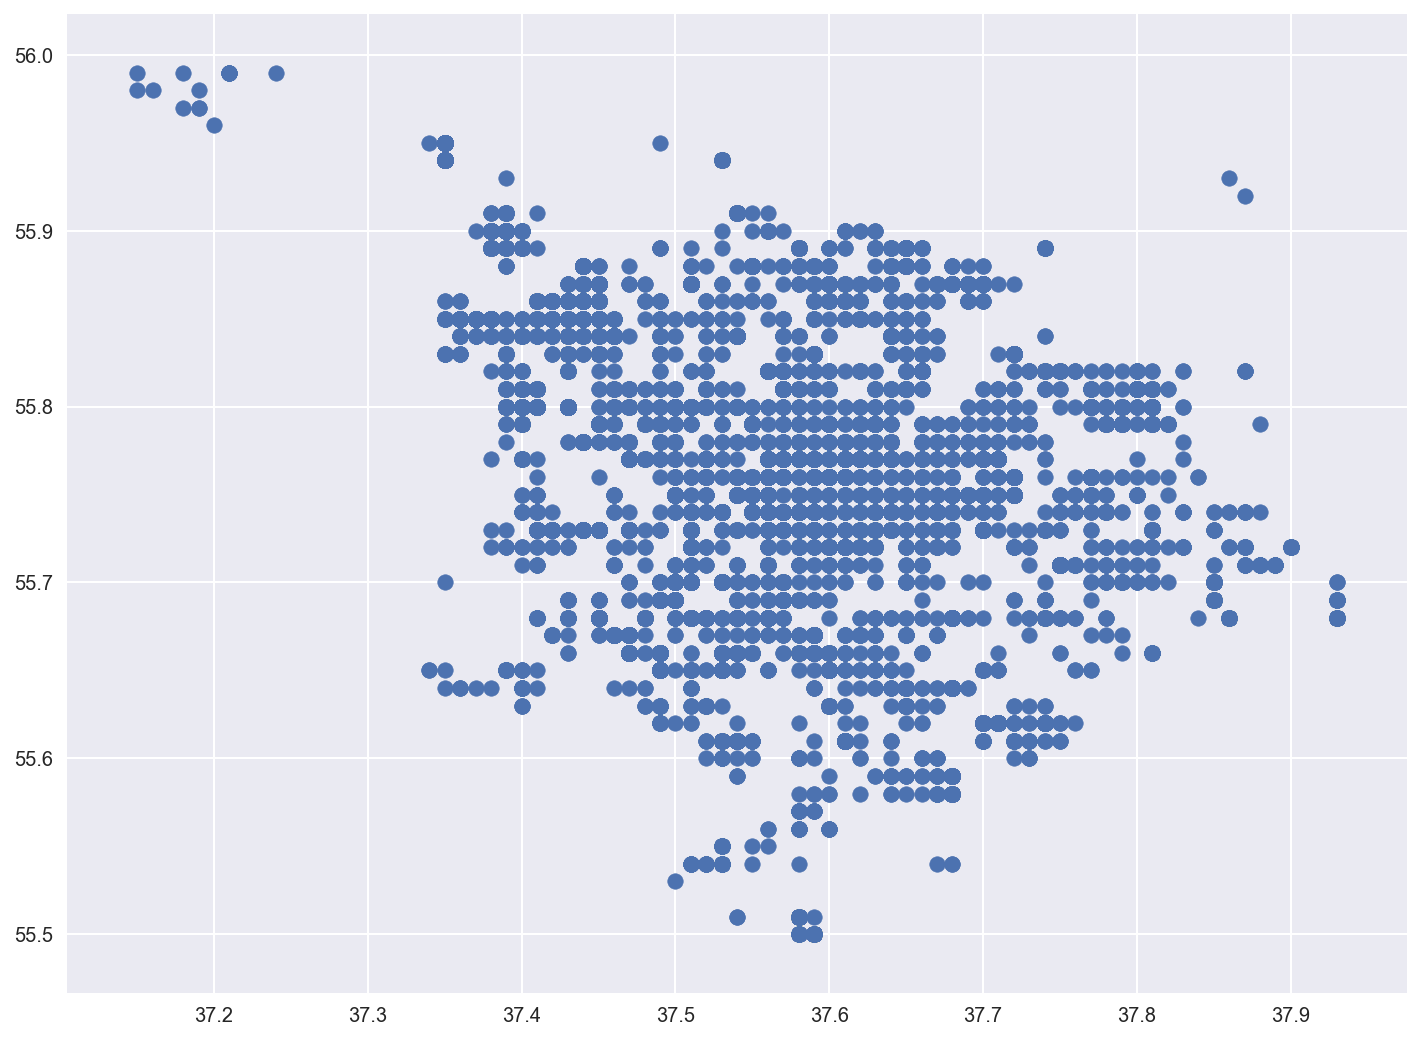

In [317]:
plt.scatter(x, y, s=60)

In [318]:
Z = list(map (lambda el: list(el), zip(x,y)))
Z[:5]

[[37.61, 55.78], [37.61, 55.78], [37.6, 55.74], [37.56, 55.73], [37.57, 55.73]]

In [319]:
len(Z)

108806

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

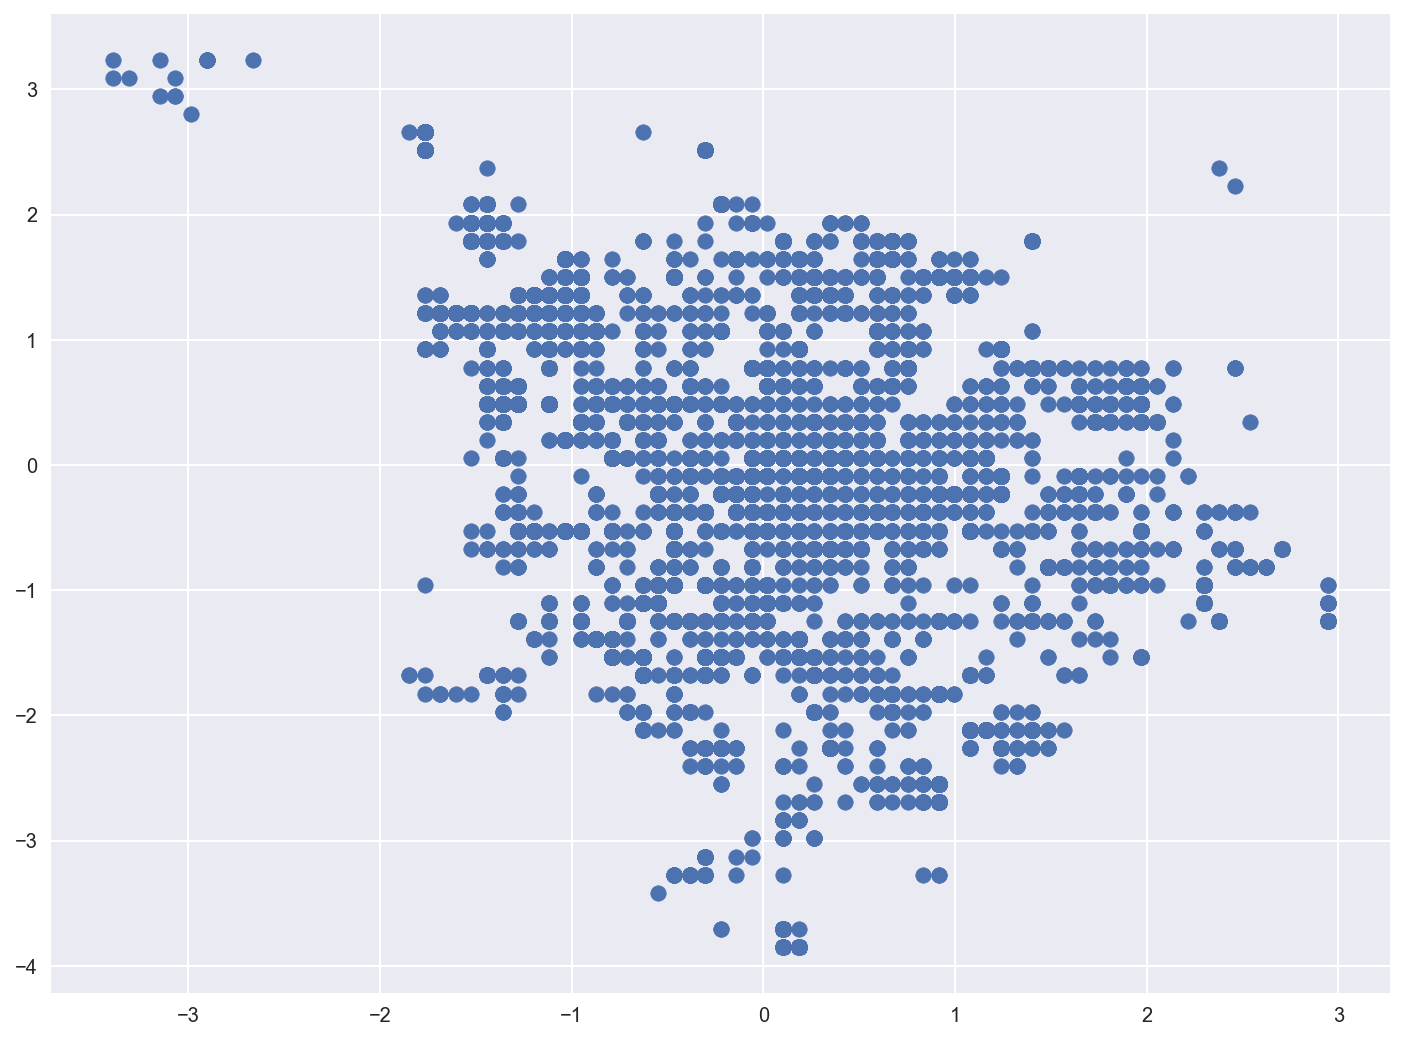

In [321]:
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60);

In [322]:
from sklearn.cluster import KMeans

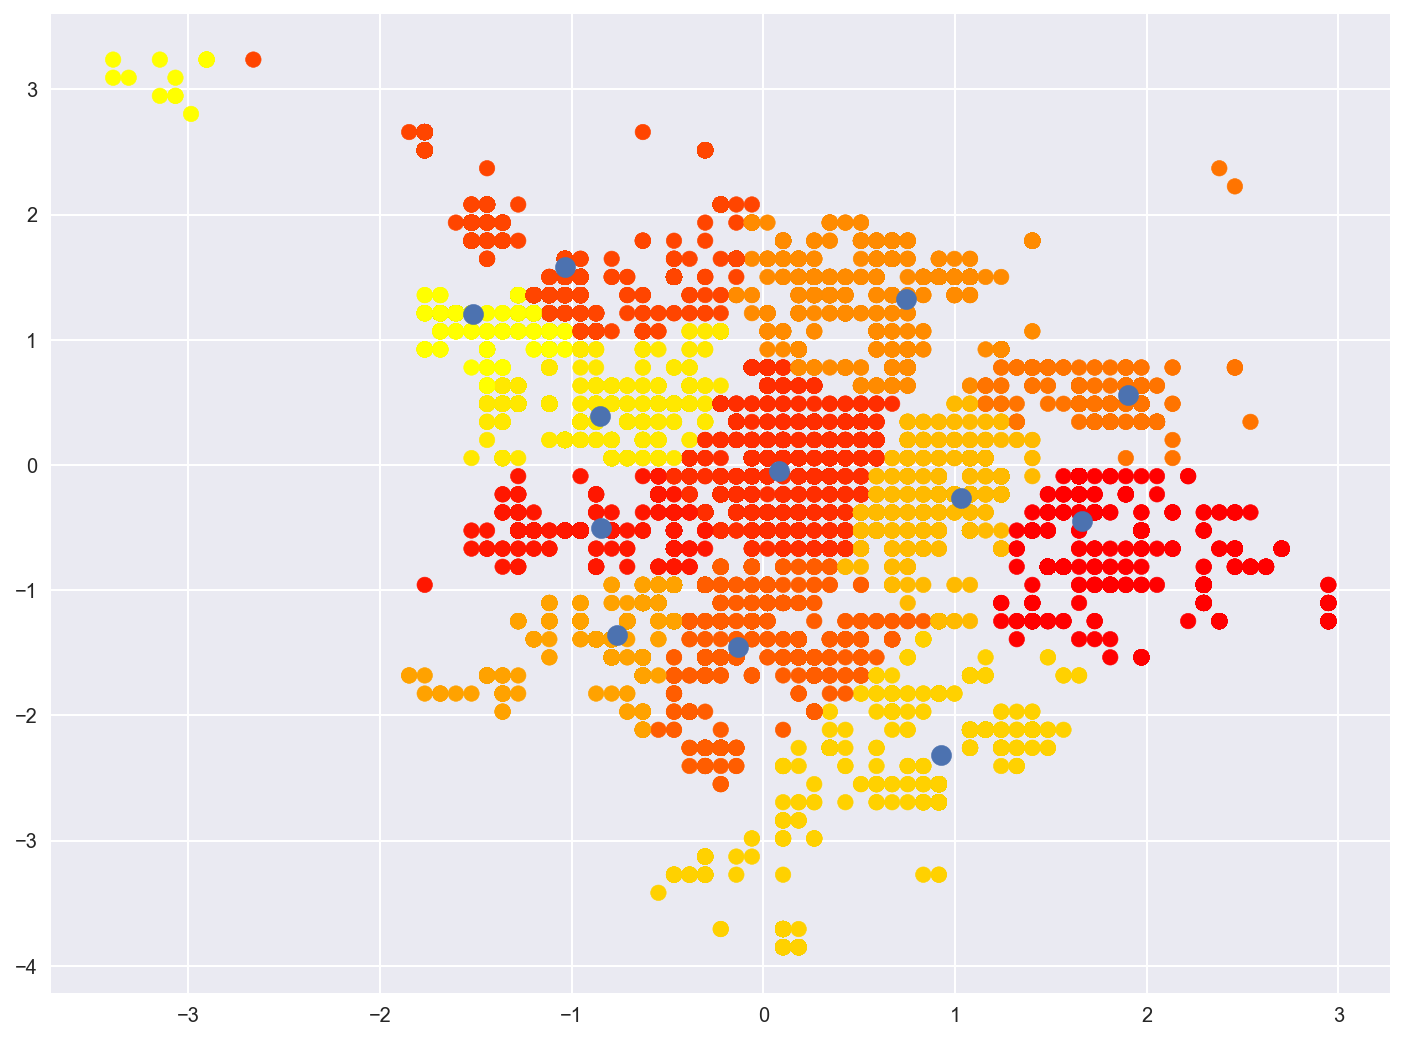

In [301]:
kmeans = KMeans(n_clusters=12)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Посмотрим как распределены x,y по голосам

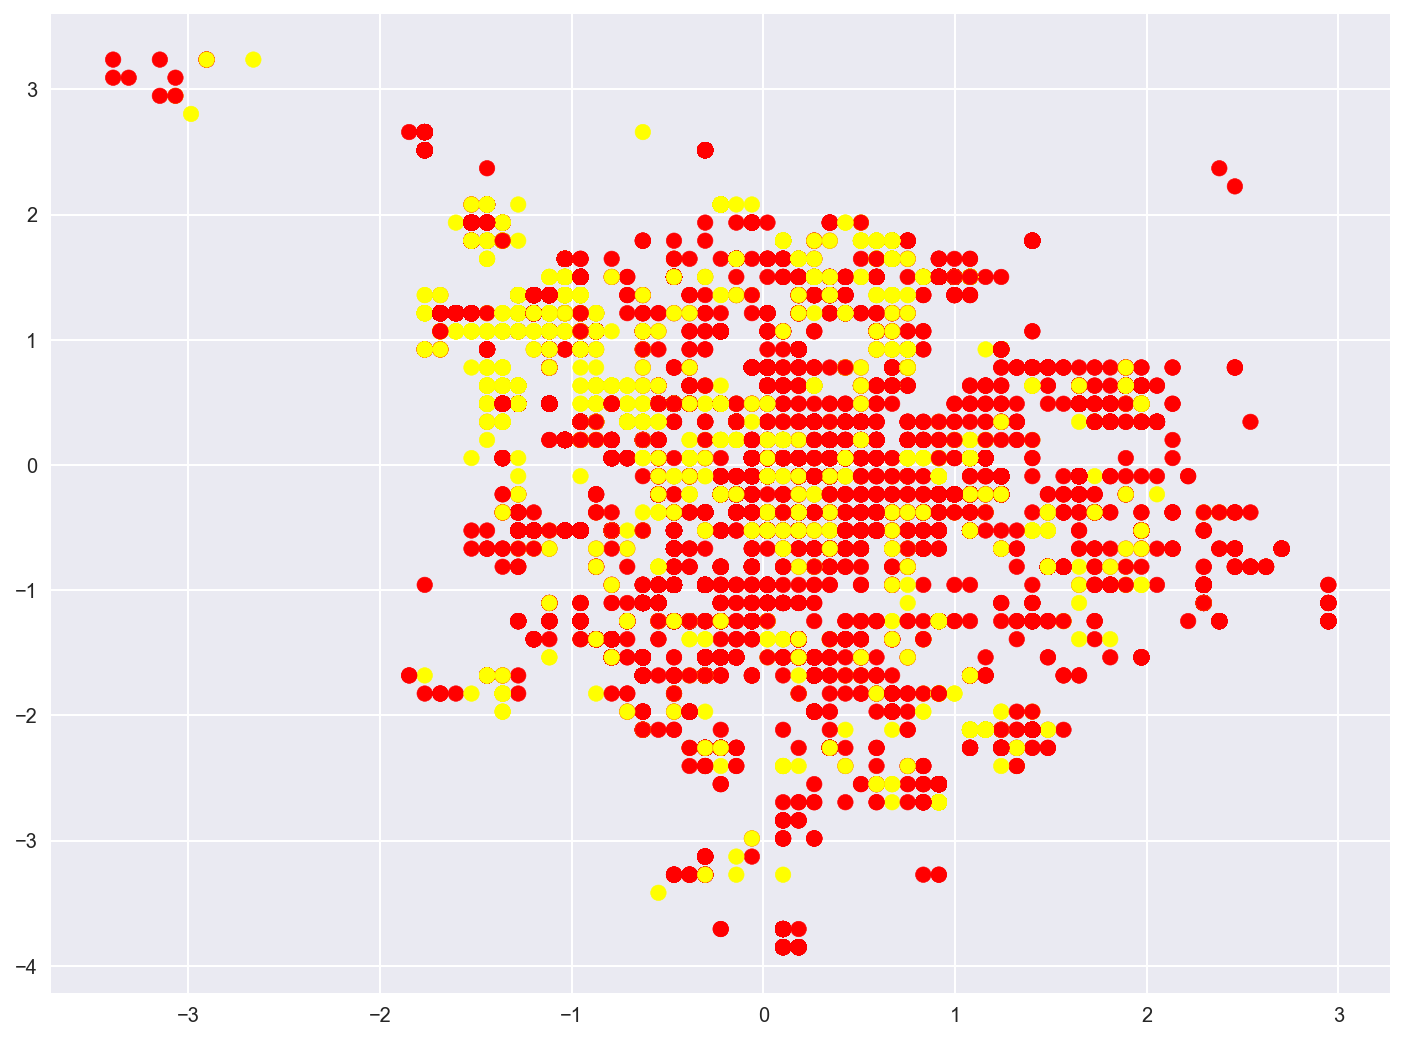

In [302]:
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=cc, cmap='autumn', s=60);

### Исследуем скопления голосов против

In [303]:
x = list(df[df['comment_class'] == -1]['x'])
x = list( map( lambda x: float(x.replace(',', '.')), x ) )
y = list(df[df['comment_class'] == -1]['y'])
y = list( map( lambda x: float(x.replace(',', '.')), y ) )
Z = list(map (lambda el: list(el), zip(x,y)))
Z[:5]

[[37.61, 55.78], [37.61, 55.78], [37.6, 55.74], [37.56, 55.73], [37.57, 55.73]]

In [304]:
len(Z)

95147

In [305]:
Z_scaled = scaler.fit_transform(Z)

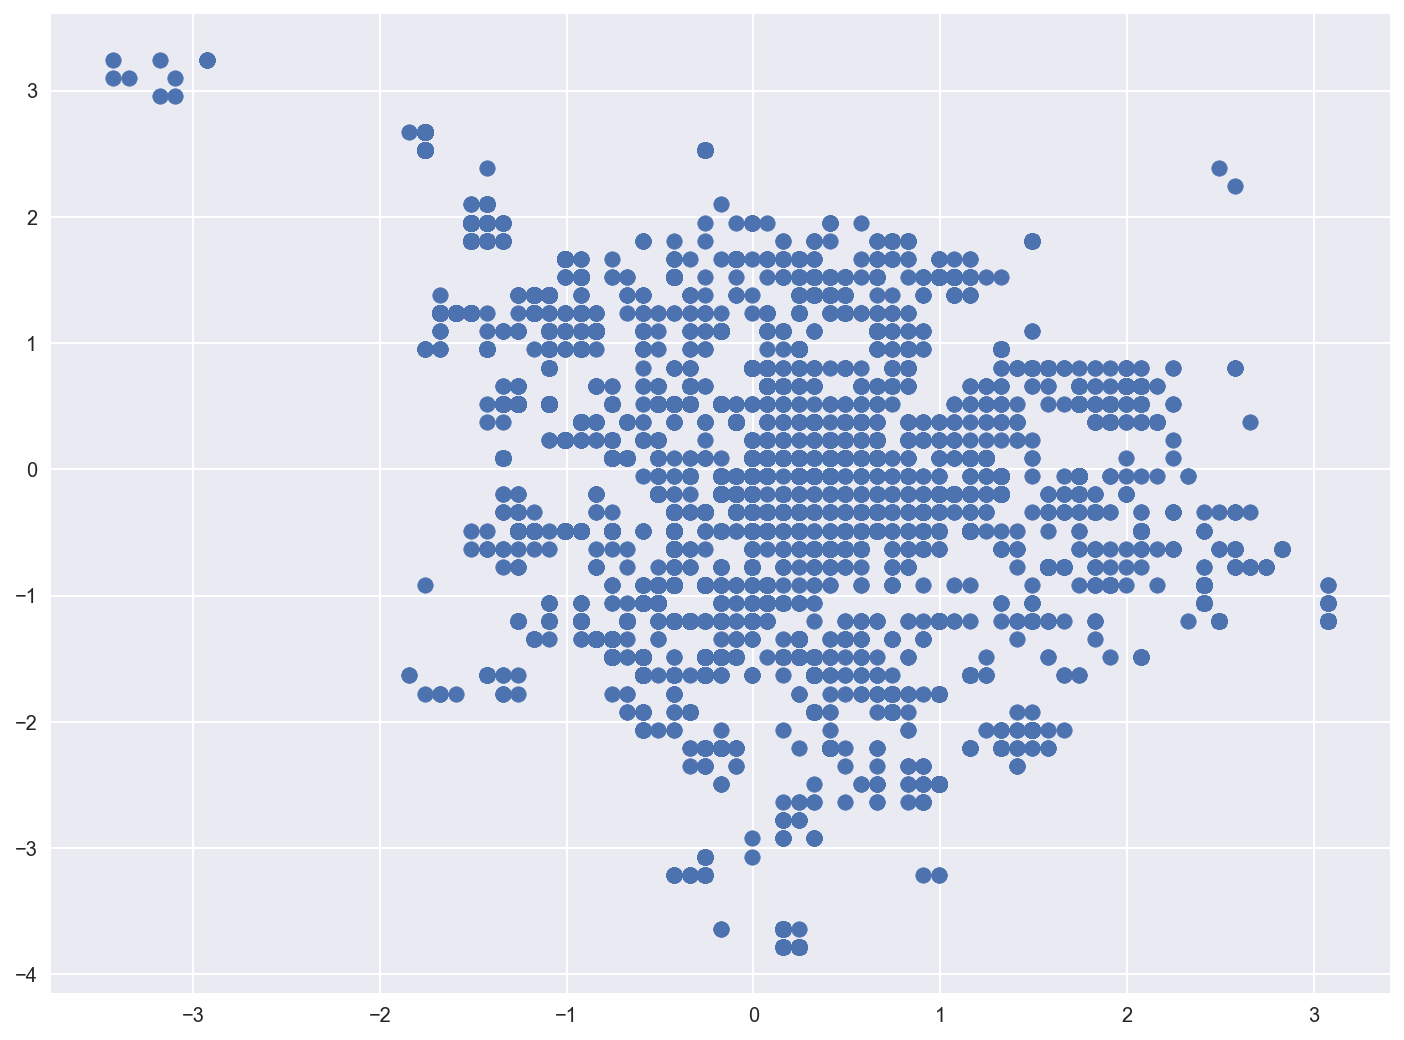

In [306]:
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60);

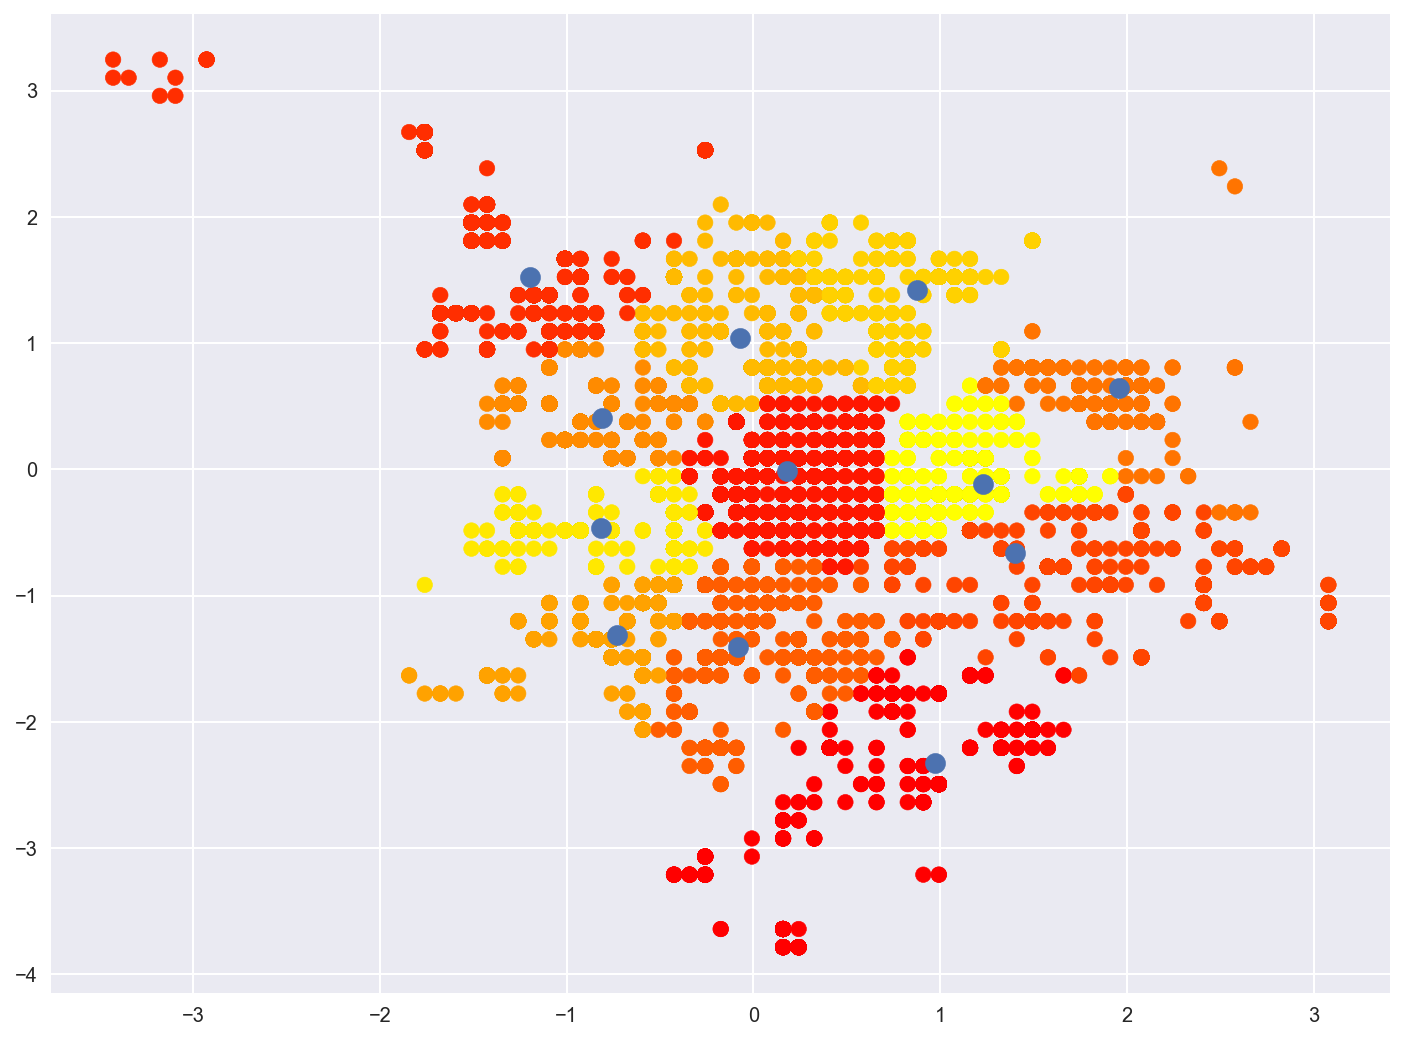

In [307]:
kmeans = KMeans(n_clusters=12)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Исследуем скопления голосов за

In [308]:
x = list(df[df['comment_class'] == 1]['x'])
x = list( map( lambda x: float(x.replace(',', '.')), x ) )
y = list(df[df['comment_class'] == 1]['y'])
y = list( map( lambda x: float(x.replace(',', '.')), y ) )
Z = list(map (lambda el: list(el),zip(x,y)))
len(Z)

13659

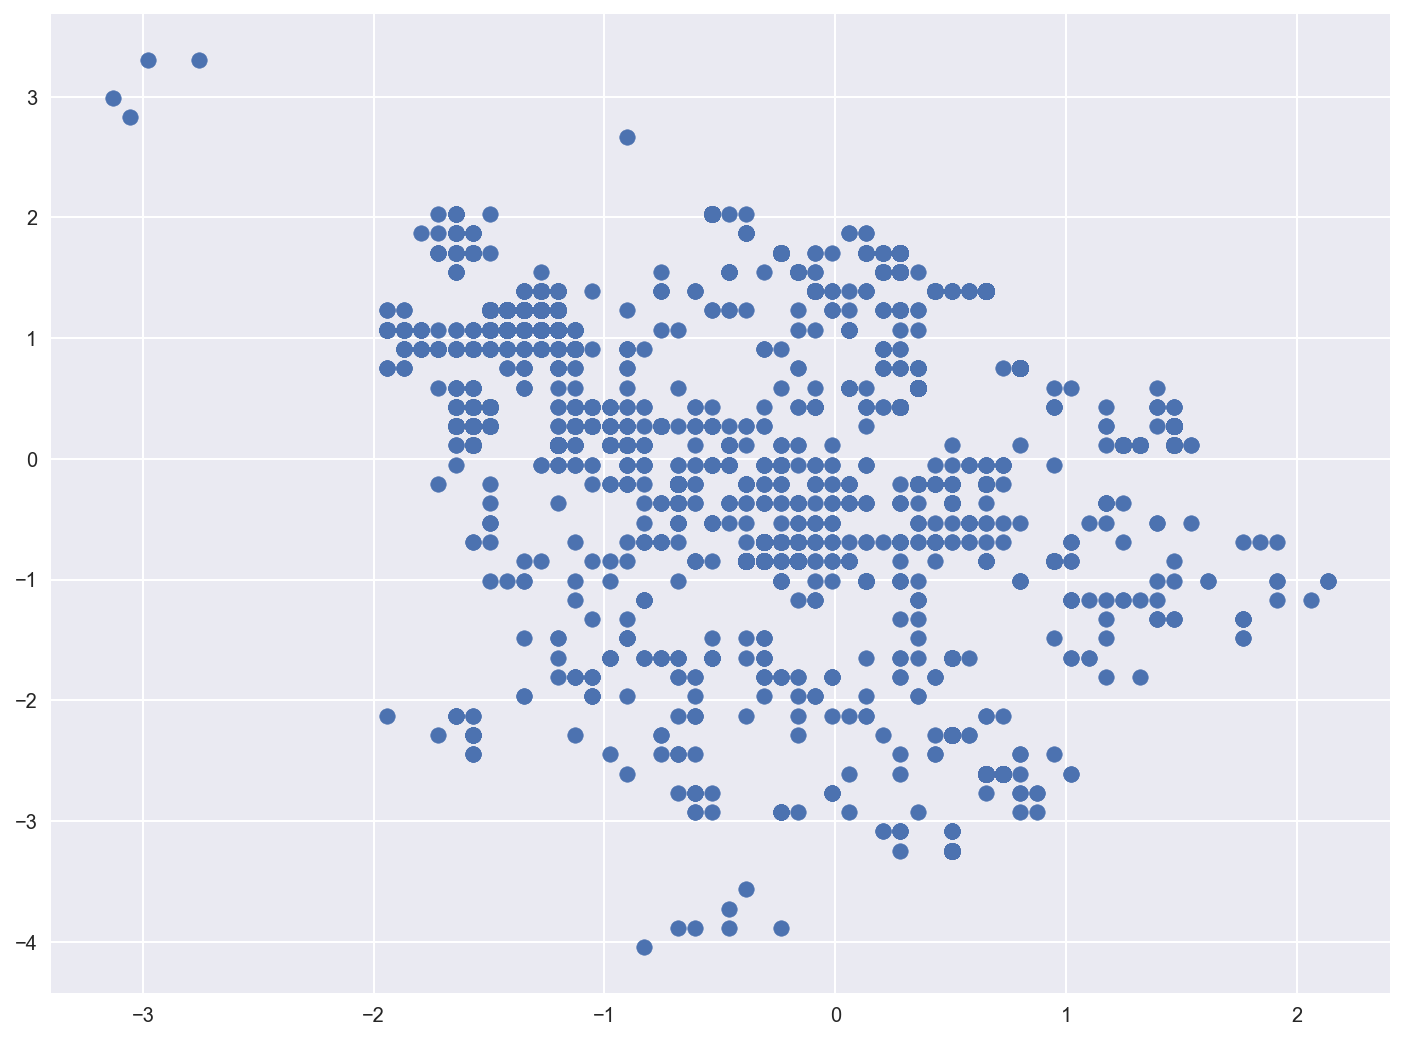

In [309]:
Z_scaled = scaler.fit_transform(Z)
plt.scatter(Z_scaled[:, 0], Z_scaled[:, 1], s=60)

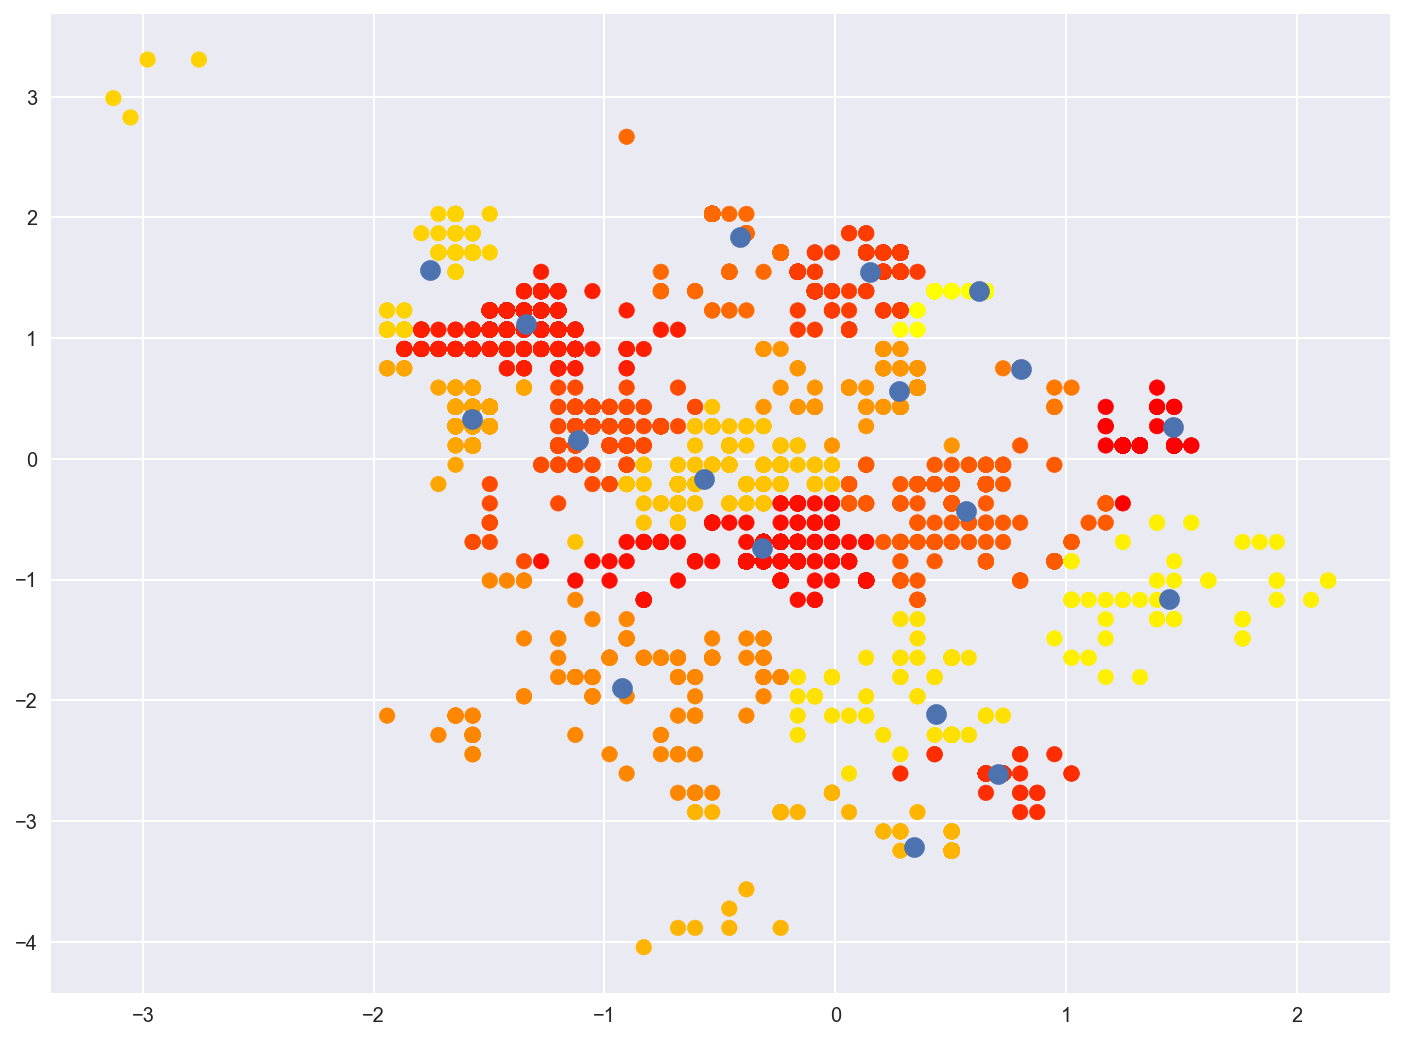

In [310]:
kmeans = KMeans(n_clusters=18)
kmeans_pred = kmeans.fit_predict(Z_scaled)
plt.scatter(Z_scaled[:,0], Z_scaled[:,1], c=kmeans_pred, cmap='autumn', s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100);

### Подберём оптимальное число кластеров для KMeans

In [323]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(Z_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

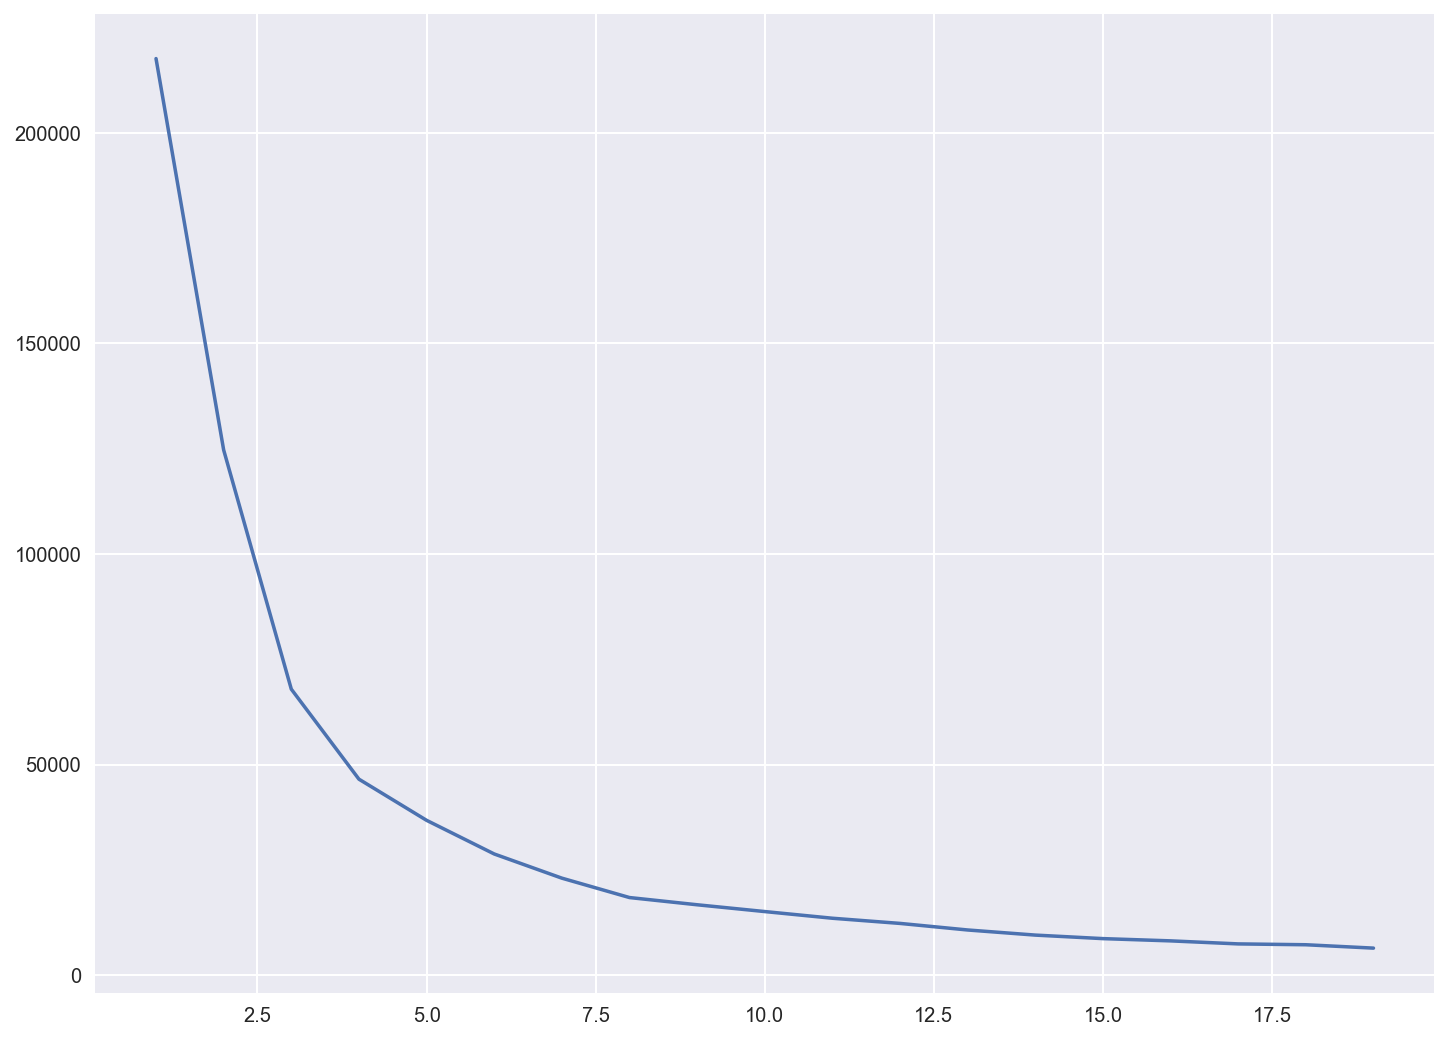

In [324]:
plt.plot(ks, k_inertia);

In [325]:
diff = np.diff(k_inertia)
diff

array([-92908.15724724, -56778.32780686, -21373.4655923 ,  -9767.17362281,
        -7988.09331499,  -5740.21506352,  -4606.34334109,  -1713.64539172,
        -1613.08252687,  -1585.79038578,  -1227.81460533,  -1559.74195623,
        -1213.64748327,   -836.75928805,   -534.25671133,   -719.38711355,
         -200.99398015,   -801.25959942])

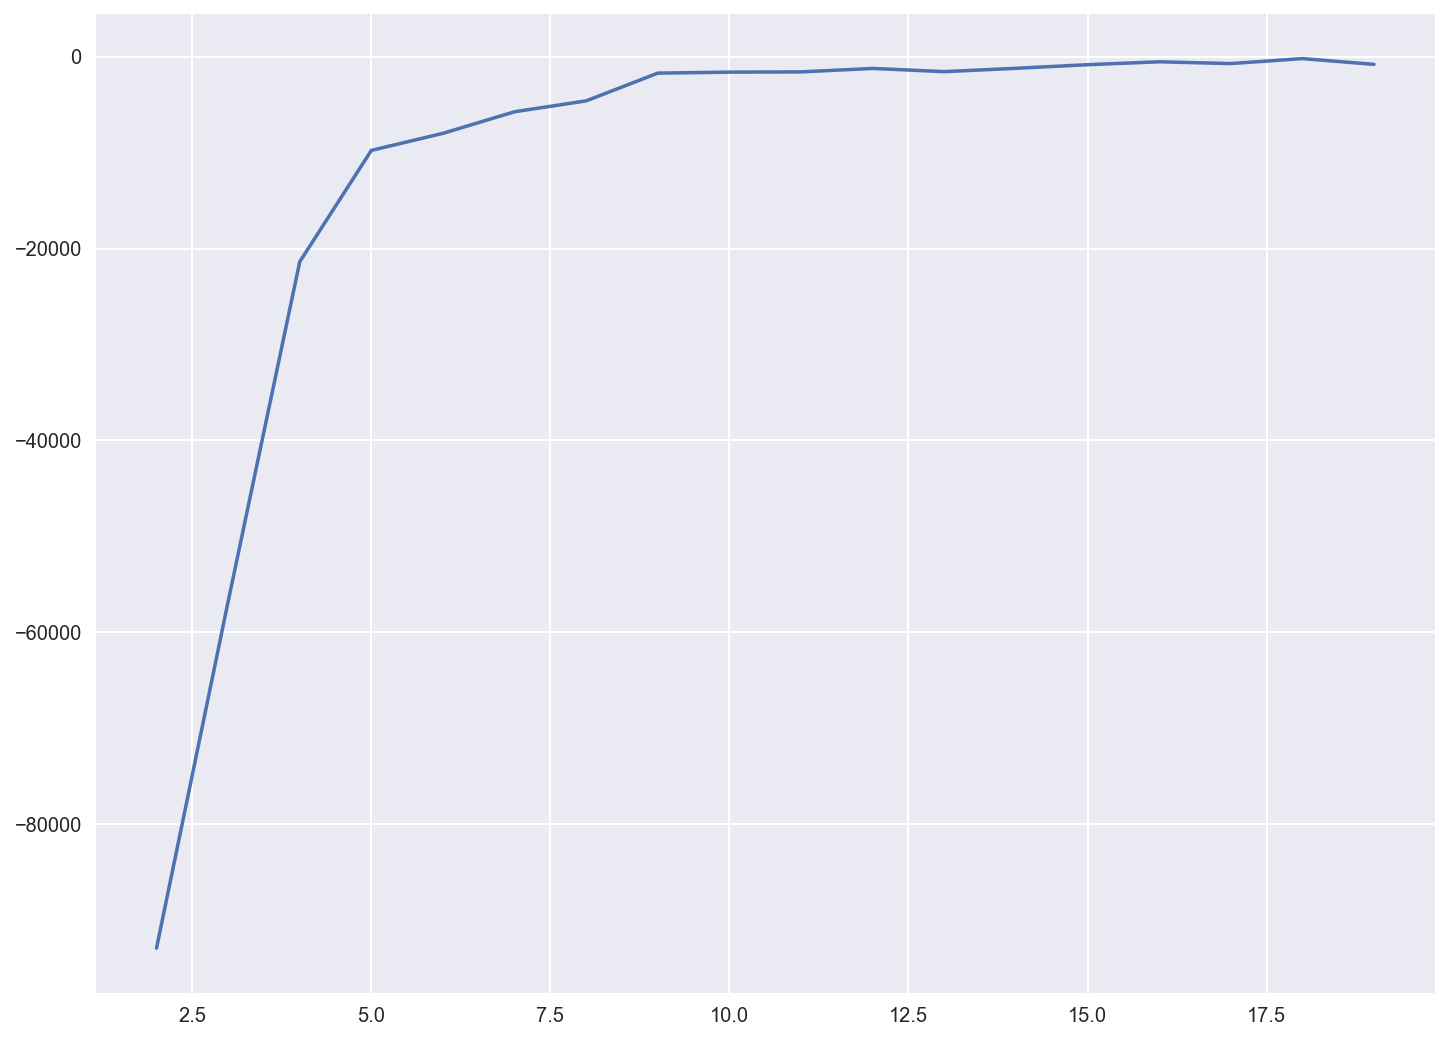

In [326]:
plt.plot(ks[1:], diff);

In [327]:
diff_r = diff[1:] / diff[:-1]

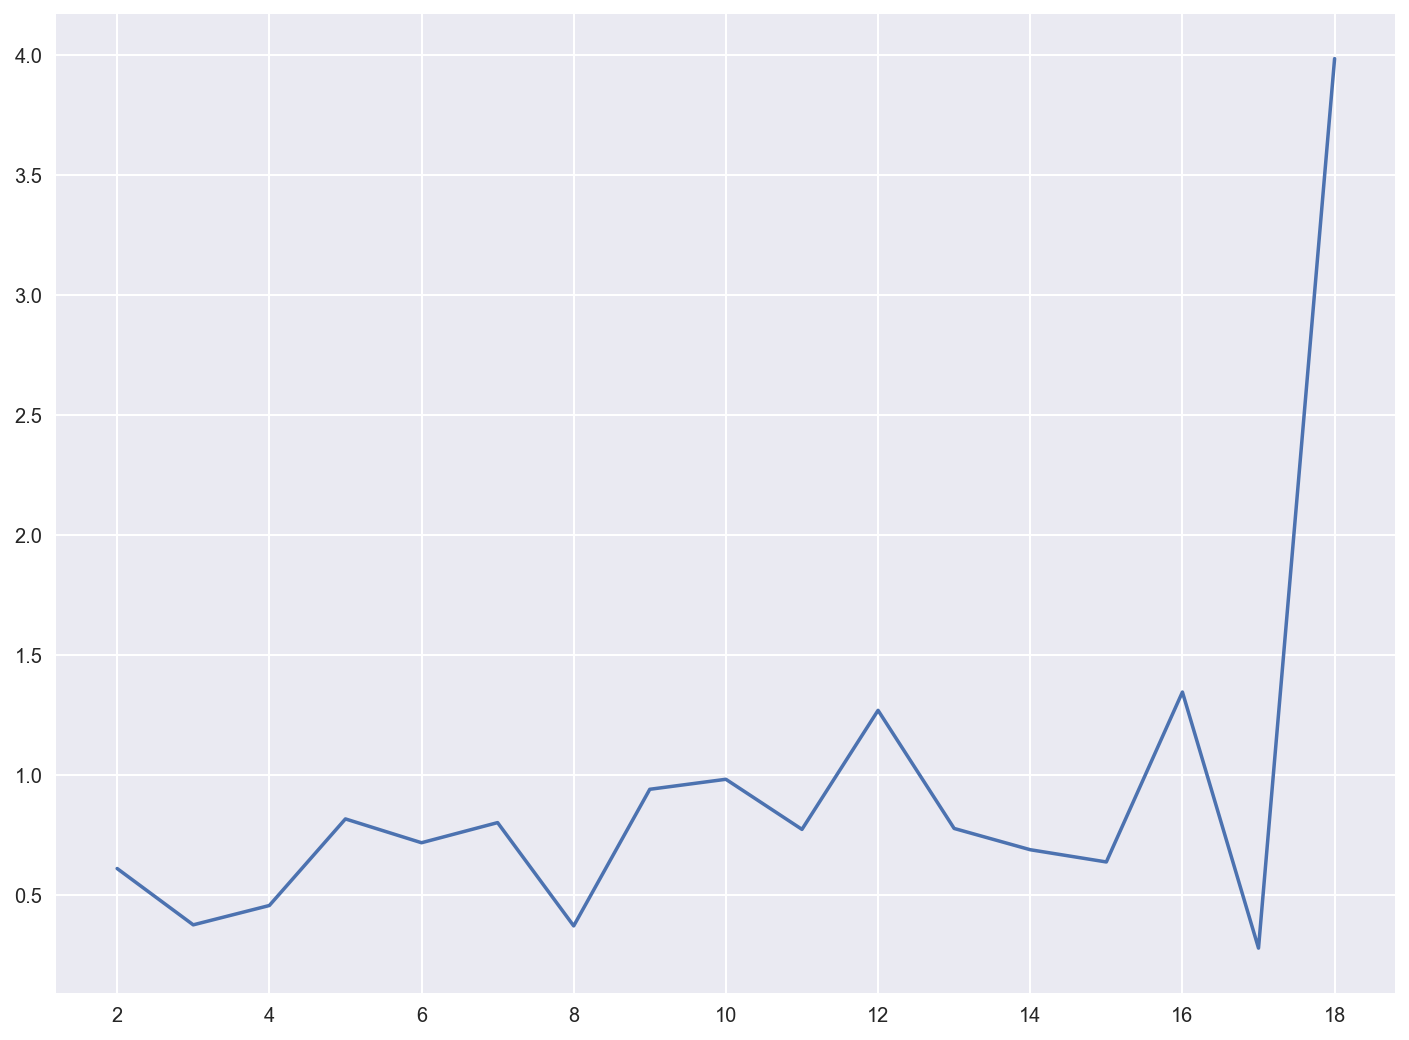

In [328]:
plt.plot(ks[1:-1], diff_r)

In [329]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

17